## Análise de sentimentos - IMDB reviews - Pandas

In [1]:
# Medição do tempo de execução
import time

# Inicia a marcação do tempo
st = time.time()

In [2]:
import numpy as np
import pandas as pd

# NLP
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Carregamento dos dados
data = pd.read_csv("./imdb-reviews-pt-br.csv")
data.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
# Limpa os caracteres especiais e espaços do texto
data['texto_regex'] = data['text_pt'].str.replace("[\$#,\"!%&'()*+-./;;<=>?@^_`´{|}~\\\\]", '', regex=True)
data['texto_limpo'] = data['texto_regex'].str.strip()

data.head(5)

,id,text_en,text_pt,sentiment,texto_regex,texto_limpo
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,Mais uma vez o Sr Costner arrumou um filme por...,Mais uma vez o Sr Costner arrumou um filme por...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,Primeiro de tudo eu odeio esses raps imbecis q...,Primeiro de tudo eu odeio esses raps imbecis q...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...


In [5]:
#data.drop('id', axis=1, inplace=True) #Acrescentado para teste e verificação da acurácia

In [6]:
import nltk

# Word Tokenizer
tokenizer = nltk.tokenize.word_tokenize

# Remove stopwords
def preprocess_text(data):
    stop = stopwords.words('portuguese') # Lista as stop words
    data = data.str.lower() # Converte todas as letras para minúsculas
    data = data.apply(lambda x:' '.join([words for words in x.split() if words not in stop])) # Remove as stop words
    return data

data['tokens'] = preprocess_text(data['texto_limpo']) 

In [7]:
# Criação de label para o sentimento
data['label'] = data['sentiment'].map({'neg':0,'pos':1})
data.head(5)

,id,text_en,text_pt,sentiment,texto_regex,texto_limpo,tokens,label
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,Mais uma vez o Sr Costner arrumou um filme por...,Mais uma vez o Sr Costner arrumou um filme por...,vez sr costner arrumou filme tempo necessário ...,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,Este é um exemplo do motivo pelo qual a maiori...,Este é um exemplo do motivo pelo qual a maiori...,exemplo motivo maioria filmes ação mesmos gené...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,Primeiro de tudo eu odeio esses raps imbecis q...,Primeiro de tudo eu odeio esses raps imbecis q...,primeiro tudo odeio raps imbecis poderiam agir...,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,Nem mesmo os Beatles puderam escrever músicas ...,Nem mesmo os Beatles puderam escrever músicas ...,beatles puderam escrever músicas todos gostass...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,Filmes de fotos de latão não é uma palavra apr...,Filmes de fotos de latão não é uma palavra apr...,filmes fotos latão palavra apropriada verdade ...,0


In [8]:
# Vetorização TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.tokens)

In [9]:
# Separa os dados em um conjunto de treinamento e outro de teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3,shuffle=True)

In [10]:
# Criação do modelo
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=101).fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [11]:
# Calcula a acuracia do modelo
from sklearn import metrics

acuracia_sklearn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy =", acuracia_sklearn )

Accuracy = 0.7079121175360561


In [12]:
# obtém o tempo final
et = time.time()

# calcula o tempo de execução
elapsed_time_sklearn = et - st

## Análise de sentimentos - IMDB reviews - Pyspark

In [13]:
# Medição do tempo de execução
import time

# Inicia a marcação do tempo
st = time.time()

In [14]:
# Cria a sessão no Pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("AnaliseNLP") \
    .getOrCreate()

In [15]:
# Faz a leitura da base
dados = spark.read.csv("./imdb-reviews-pt-br.csv",
                       escape="\"",
                       header=True,
                       inferSchema=True)

In [16]:
# Mostra o schema dos dados
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- text_en: string (nullable = true)
 |-- text_pt: string (nullable = true)
 |-- sentiment: string (nullable = true)



In [17]:
dados.show(5)

+---+--------------------+--------------------+---------+
| id|             text_en|             text_pt|sentiment|
+---+--------------------+--------------------+---------+
|  1|Once again Mr. Co...|Mais uma vez, o S...|      neg|
|  2|This is an exampl...|Este é um exemplo...|      neg|
|  3|First of all I ha...|Primeiro de tudo ...|      neg|
|  4|Not even the Beat...|Nem mesmo os Beat...|      neg|
|  5|Brass pictures mo...|Filmes de fotos d...|      neg|
+---+--------------------+--------------------+---------+
only showing top 5 rows



In [18]:
# Limpa os caracteres especiais e espaços do texto
import pyspark.sql.functions as f
dados = dados.withColumn("texto_regex", f.regexp_replace("text_pt", "[\$#,\"!%&'()*+-./;;<=>?@^_`´{|}~\\\\]", ""))
dados = dados.withColumn("texto_limpo", f.trim(dados.texto_regex))

dados.show(5)

+---+--------------------+--------------------+---------+--------------------+--------------------+
| id|             text_en|             text_pt|sentiment|         texto_regex|         texto_limpo|
+---+--------------------+--------------------+---------+--------------------+--------------------+
|  1|Once again Mr. Co...|Mais uma vez, o S...|      neg|Mais uma vez o Sr...|Mais uma vez o Sr...|
|  2|This is an exampl...|Este é um exemplo...|      neg|Este é um exemplo...|Este é um exemplo...|
|  3|First of all I ha...|Primeiro de tudo ...|      neg|Primeiro de tudo ...|Primeiro de tudo ...|
|  4|Not even the Beat...|Nem mesmo os Beat...|      neg|Nem mesmo os Beat...|Nem mesmo os Beat...|
|  5|Brass pictures mo...|Filmes de fotos d...|      neg|Filmes de fotos d...|Filmes de fotos d...|
+---+--------------------+--------------------+---------+--------------------+--------------------+
only showing top 5 rows



In [19]:
#dados = dados.drop("id") # Acrescentado para teste e verificação da acurácia

In [20]:
# Importa as bibliotecas necessárias
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, HashingTF, IDF #Tokenizer do pyspark já faz o tolower

In [21]:
# Criação de label para o sentimento
from pyspark.ml.feature import StringIndexer

stringindexer = StringIndexer(inputCol="sentiment", outputCol="label")
dados = stringindexer.fit(dados).transform(dados)

In [22]:
# Contagem de sentimentos
dados.groupBy(['sentiment','label']).count().show()

+---------+-----+-----+
|sentiment|label|count|
+---------+-----+-----+
|      neg|  0.0|24765|
|      pos|  1.0|24694|
+---------+-----+-----+



In [23]:
# Criação do pipeline de pré-processamento
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier

# Passos do pipeline
tokenizer = Tokenizer(inputCol = "texto_limpo", outputCol = "tokens") # Tokenizador
stopwords = StopWordsRemover(inputCol="tokens", outputCol="texto_final") # Stop Words
hashingTF = HashingTF(inputCol=stopwords.getOutputCol(), outputCol="HTF", numFeatures=1000) # HashingTF
tfidf = IDF(inputCol="HTF", outputCol="features") # TF-IDF
dt = DecisionTreeClassifier(featuresCol='features', labelCol='label') # Decision Tree

pipeline = Pipeline(stages = [tokenizer, stopwords, hashingTF, tfidf, dt]) # Cria o pipeline

In [24]:
# Separa os dados em um conjunto de treinamento e outro de teste
train, test = dados.randomSplit([0.7, 0.3], seed = 101)

In [25]:
# Treina o modelo
dt_model = pipeline.fit(train)

In [26]:
# Faz a predição
predictions = dt_model.transform(test)
predictions.select(['label', 'prediction']).show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       1.0|
|  0.0|       1.0|
|  0.0|       0.0|
|  0.0|       1.0|
|  0.0|       0.0|
+-----+----------+
only showing top 5 rows



In [27]:
# Calcula a acuracia do modelo
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

acuracia_pyspark = evaluator.evaluate(predictions)
print("Accuracy =", acuracia_pyspark)

Accuracy = 0.6427433275793387


In [28]:
# Encerra a sessão do Pyspark
spark.stop()

In [29]:
# obtém o tempo final
et = time.time()

# calcula o tempo de execução
elapsed_time_pyspark = et - st

In [30]:
# Mostra os tempos de execução do SKLearn e do PySpark, bem como sua acurácia
print('Execution time - SKLearn:', elapsed_time_sklearn, 'seconds')
print("Accuracy =", acuracia_sklearn )
print(" ")
print('Execution time - PySpark:', elapsed_time_pyspark, 'seconds')
print("Accuracy =", acuracia_pyspark )

Execution time - SKLearn: 170.82633090019226 seconds
Accuracy = 0.7079121175360561
 
Execution time - PySpark: 75.65196514129639 seconds
Accuracy = 0.6427433275793387


## Plotagens dos gráficos

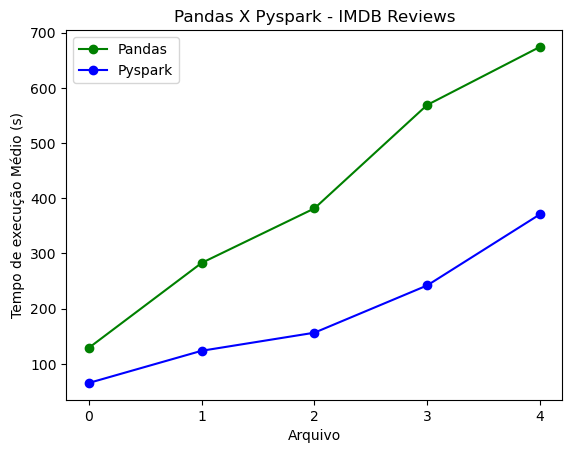

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

# Define two lists
y = [129.211, 282.943, 381.639, 568.996, 674.171] #Pandas
y2 = [65.526, 123.766, 156.493, 242.068, 370.85] #Pyspark


plt.title('Pandas X Pyspark - IMDB Reviews', color='black', size=12)

# Plot lists and show them
plt.plot(y, 'go-', label="Pandas")
plt.plot(y2, 'bo-', label="Pyspark")

plt.xticks([0,1,2,3,4])

# Plot axes labels and show the plot
plt.xlabel('Arquivo')
plt.ylabel('Tempo de execução Médio (s)')
plt.legend(loc="upper left")
plt.show()

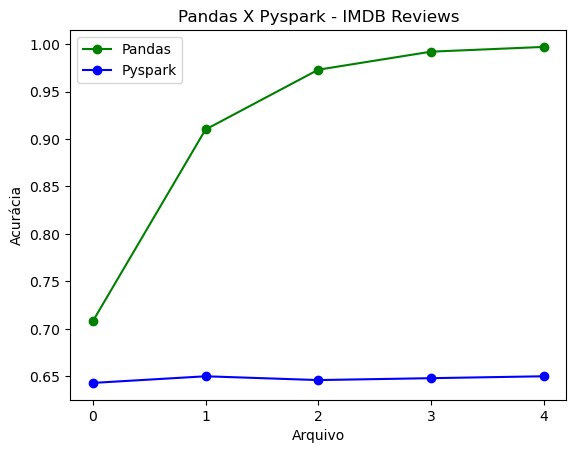

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

# Define two lists
y = [0.708, 0.91, 0.973, 0.992, 0.997] #Pandas
y2 = [0.643, 0.65, 0.646, 0.648, 0.65] #Pyspark


plt.title('Pandas X Pyspark - IMDB Reviews', color='black', size=12)

# Plot lists and show them
plt.plot(y, 'go-', label="Pandas")
plt.plot(y2, 'bo-', label="Pyspark")

plt.xticks([0,1,2,3,4])

# Plot axes labels and show the plot
plt.xlabel('Arquivo')
plt.ylabel('Acurácia')
plt.legend(loc="upper left")
plt.show()